<a href="https://colab.research.google.com/github/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/blob/main/Proyecto_EntregaPlus_Comision61190_RodriguezCastilloLeonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentacion de Proyecto ENTREGA PLUS**

## **1.- Hipótesis.**
***Primer Hipóteseis***: La zona geográfica donde se envían los
pedidos influye en nuestros indicadores de:
* Puntualidad de Entrega de Pedidos
* Efectividad de Entrega de Pedidos

Con lo cual entendemos que sabiendo donde debemos entregar cada uo de ellos, podemos establecer una probabilidad de NO ENTREGA, que nos va a permitir tomar acciones para que cada pedido con baja probalidad de entrega, sea finalmente entregado en su primer visita

***Segunda Hipóteseis***: Los proveedores logísticos pueden ser más fuertes en una zona que en otra

## **2. - Objetivo y alcance.**
El Objetivo del proyecto es poder crear un modelo que pueda identificar para cada pedido, si el mismo se va a entregar o no en la primer visita que realice nuestro proveedor logístico.

# **Data Acquisition**

## **Metadata**

**1.- Descripción de los datos.**

El set de datos es acerca de pedidos de la empresa EPSILON S.A., los cuales hacen referencia a los detalles para la entrega de los mismos a nuestros clientes.

**2.- Detalles generales del dataset**
* Cantidad de Registros: 190152
* Volumen de Crecimiento Estimado Diario: 5000
* Datos del año 2024

**3.- Diccionario de datos.**

| Columna | Tipo de Dato |
|---------|--------------|
| Entrega |  int64 |
| Fecha Pedido | datetime64 |
| Distribuidor | category |
| Distribuidor Sigla | category |
| Tipo de Distribución Comercial | category |
| Codigo Postal | int64 |
| Id Provincia | int64 |
| Provincia | category |
| Localidad | category |
| Departamento |category |
| Aglomerado |category |
| Id Zona Logistica | int64 |
| Zona Logistica |category |
| Zona E-Commerce |category |
| Periodo |category |
| Año | int64 |
| Mes Sigla |category |
| Mes Nombre |category |
| Mes Numero | int64 |
| Trimestre Sigla |category |
| Trimestre Nombre |category |
| Trimestre Numero | int64 |
| Semestre | int64 |
| Año Semana |category |
| Dia Semana Sigla |category |
| Dia Semana Numero | int64 |
| Dia Semana Nombre |category |
| Hora Pedido | int64 |
| Visita 1 Fecha | datetime64[ns] |
| Visita 1 Hora | object |
| ID Visita 1 Motivo |category |
| Visita 1 Motivo |category |
| Dias Primer Visita | int64 |
| Flag Visita 1 Puntual |category |
| Estado Visita |category |
| Estado Distribución |category |
| Calidad de la Direccion |category |
| Cantidad de Pedidos | int64 |
| Visita 1 Puntual | int64 |
| Cant. Primera Visita | int64 |
| Cant. Vis. y Ent. 1ra Visita | int64 |
| Cantidad Celulares | int64 |
| Cantidad Accesorios | int64 |
| Peso Bruto | float64 |
| Valor Total en Pesos | float64 |
| Valor Total en Dolares | float64 |
| Provincia Sigla | object |
| Hora Visita | int64 |

## **Importacion de Dataset**

In [1]:
#Instalación de Librerías
!pip install dataprep
!pip install chart_studio
!pip install mglearn
!pip install gapminder

#Importación de Librerías
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.animation as animation
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import missingno as msno
import scipy
#La Librería Scipy es exclusiva de datos estadísticos

import requests
#La librería requests en Python es una herramienta poderosa y popular que se utiliza para realizar solicitudes HTTP de manera sencilla
#y eficiente. Permite interactuar con páginas web, APIs RESTful, y otros servicios basados en HTTP
import json

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
#La librería warnings en Python se utiliza para gestionar y controlar mensajes de advertencia (warnings) durante la ejecución de un programa.
#A diferencia de los errores, que detienen la ejecución del programa, los warnings son mensajes informativos que indican situaciones potencialmente
#problemáticas, pero permiten que el programa continúe ejecutándose

import mglearn
#La librería mglearn (abreviatura de mglearn) es una herramienta complementaria que facilita el aprendizaje y la enseñanza de Machine Learning en Python.
#Está diseñada principalmente para ilustrar conceptos básicos de aprendizaje automático de manera visual e intuitiva

import graphviz
#La librería graphviz en Python se utiliza para trabajar con Graphviz, una herramienta de visualización gráfica que permite crear y
#representar grafos dirigidos y no dirigidos. Es especialmente útil para crear diagramas jerárquicos, flujos de trabajo, árboles de decisión,
#redes de dependencias y otras estructuras gráficas

import folium  #needed for interactive map
from folium.plugins import HeatMap
#La librería folium en Python se utiliza para crear mapas interactivos de manera sencilla y visualmente atractiva. Es una herramienta ideal para trabajar
#con datos geoespaciales y visualizar información geográfica superpuesta en mapas

from IPython.display import display
from IPython.display import HTML
#La librería IPython.display de Python es un módulo utilizado principalmente en entornos interactivos como Jupyter Notebooks. Su función es proporcionar
#herramientas para mostrar salidas de una manera más rica y flexible, como imágenes, gráficos, HTML, audio y más. Esto mejora la experiencia de visualización
#y presentación de resultados
#La librería display en Python es parte del paquete IPython.display, que proporciona funciones para mostrar objetos de manera interactiva y enriquecida
#dentro de entornos como Jupyter Notebook o Google Colab.
#Permite mostrar no solo texto, sino también imágenes, gráficos, HTML, Markdown, audio, video y otros tipos de datos de forma estructurada
#y visualmente atractiva
#La función HTML se usa para mostrar contenido HTML directamente en el cuaderno de Jupyter. Esto es especialmente útil para integrar código HTML en tus
#celdas y ver cómo se presenta sin tener que crear archivos externos.

from bokeh.io import show, output_file
#La librería bokeh.io es parte del ecosistema de Bokeh en Python, una herramienta para crear visualizaciones interactivas de alta calidad que se pueden
#integrar fácilmente en aplicaciones web o presentaciones.
#Bokeh es especialmente útil cuando se quiere trabajar con gráficos dinámicos y visualizaciones interactivas para la web, como gráficos de líneas, barras,
#dispersión, mapas, y más, todo en tiempo real.
#Las funciones show y output_file provienen de la librería Bokeh, que se utiliza para crear visualizaciones interactivas en Python. Estas funciones son
#clave para mostrar los gráficos creados con Bokeh, ya sea en un navegador web o como parte de un archivo HTML

from bokeh.plotting import figure
#La librería bokeh.plotting de Bokeh en Python se utiliza para crear visualizaciones interactivas y dinámicas en el navegador web. Permite generar gráficos
#y visualizaciones atractivas que los usuarios pueden explorar de manera interactiva, como hacer zoom, mover, o seleccionar puntos en los gráficos.
#Bokeh es especialmente útil para proyectos que requieren visualización web o dashboard interactivo.
#La función figure de la librería Bokeh en Python es el núcleo para crear gráficos interactivos y personalizados. Bokeh es una biblioteca poderosa para
#la visualización de datos, y la función figure actúa como un lienzo donde puedes agregar elementos visuales, como gráficos de líneas, barras, puntos, etc.

from bokeh.models import DatetimeTickFormatter
#bokeh.models contiene modelos que proporcionan herramientas, widgets y componentes que puedes utilizar para personalizar y mejorar las visualizaciones
#en Bokeh.
#Estos modelos permiten añadir interactividad, controlar las propiedades visuales de los elementos gráficos, y configurar la forma en que los gráficos
#responden a las acciones del usuario.

from mlxtend.plotting import plot_decision_regions
#La librería mlxtend.plotting es parte de mlxtend (machine learning extensions), una biblioteca de Python que proporciona herramientas adicionales para el
#análisis y visualización de datos, especialmente orientadas a machine learning y análisis exploratorio. La sublibrería mlxtend.plotting está diseñada para
#facilitar la visualización de resultados y modelos de aprendizaje automático, creando gráficos que son útiles tanto para la interpretación de modelos como
#para la presentación de resultados

from dataprep.eda import create_report
#La librería dataprep.eda es parte de la biblioteca dataprep en Python y está diseñada para facilitar el proceso de exploración y análisis de datos. Es una
#herramienta muy útil para realizar un análisis exploratorio de datos (EDA) de manera rápida y eficiente, sin necesidad de escribir mucho código.
#dataprep.eda automatiza muchas tareas comunes en la exploración de datos y te permite obtener información valiosa sobre tu conjunto de datos con poco esfuerzo

from gapminder import gapminder
#Gapminder es una biblioteca utilizada para trabajar con el conjunto de datos Gapminder, que contiene información socioeconómica y de salud
#de varios países a lo largo del tiempo. Este conjunto de datos es muy popular en análisis de datos, visualización y aprendizaje de estadísticas.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
label_encoder = LabelEncoder()
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import make_blobs

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This

In [2]:
#Configuración de Enlaces de los Datasets del Proyecto en Github
URL1 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_1_Pedidos_61190.xlsx'
URL2 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_2_Pedidos_61190.xlsx'
URL3 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_3_Pedidos_61190.xlsx'

In [3]:
#Cremos Dataframes con los enlaces anteriores
#A todos los campos los importo como String, para luego convertir particularmente los que no lo sean
df_2024_Sem_1 = pd.read_excel(URL1, dtype='str')
df_2024_Sem_2 = pd.read_excel(URL2, dtype='str')
df_2024_Sem_3 = pd.read_excel(URL3, dtype='str')

In [4]:
#Validamos que todas las columnas del primer dataframe sea String
df_2024_Sem_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54785 entries, 0 to 54784
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Entrega                         54785 non-null  object
 1   Canal                           54785 non-null  object
 2   Subcanal                        54785 non-null  object
 3   Fecha Pedido                    54785 non-null  object
 4   Distribuidor                    54785 non-null  object
 5   Distribuidor Sigla              54785 non-null  object
 6   Centro                          54785 non-null  object
 7   Centro Sigla                    54785 non-null  object
 8   Centro Tipo                     54785 non-null  object
 9   Tipo de Distribución Comercial  54785 non-null  object
 10  Puesto de Expedicion            54785 non-null  object
 11  Codigo Postal                   54785 non-null  object
 12  Id Provincia                    54785 non-null

In [5]:
#Validamos que todas las columnas del segundo dataframe sea String
df_2024_Sem_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88117 entries, 0 to 88116
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Entrega                         88117 non-null  object
 1   Canal                           88117 non-null  object
 2   Subcanal                        88117 non-null  object
 3   Fecha Pedido                    88117 non-null  object
 4   Distribuidor                    88117 non-null  object
 5   Distribuidor Sigla              88117 non-null  object
 6   Centro                          88117 non-null  object
 7   Centro Sigla                    88117 non-null  object
 8   Centro Tipo                     88117 non-null  object
 9   Tipo de Distribución Comercial  88117 non-null  object
 10  Puesto de Expedicion            88117 non-null  object
 11  Codigo Postal                   88117 non-null  object
 12  Id Provincia                    88117 non-null

In [6]:
#Validamos que todas las columnas del tercer dataframe sea String
df_2024_Sem_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47257 entries, 0 to 47256
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Entrega                         47257 non-null  object
 1   Canal                           47257 non-null  object
 2   Subcanal                        47257 non-null  object
 3   Fecha Pedido                    47257 non-null  object
 4   Distribuidor                    47257 non-null  object
 5   Distribuidor Sigla              47257 non-null  object
 6   Centro                          47257 non-null  object
 7   Centro Sigla                    47257 non-null  object
 8   Centro Tipo                     47257 non-null  object
 9   Tipo de Distribución Comercial  47257 non-null  object
 10  Puesto de Expedicion            47257 non-null  object
 11  Codigo Postal                   47257 non-null  object
 12  Id Provincia                    47257 non-null

In [7]:
#Creamos Dataframe Auxiliar con datos de Provicias
URL3 = 'https://infra.datos.gob.ar/georef/provincias.json'
response = requests.get(URL3)
datos_json = json.loads(response.text)
df_prov = pd.DataFrame.from_dict(datos_json['provincias'])

#Renombramos la columna "Id" a "Id Provincia"
df_prov = df_prov.rename(columns={'id': 'Id Provincia'})

#Agregamos la columna "Sigla Provincia" y le aportamos un valor a cada una
df_prov['Provincia Sigla']=""
df_prov.loc[df_prov['Id Provincia'] == '02', 'Provincia Sigla'] = 'CABA'
df_prov.loc[df_prov['Id Provincia'] == '06', 'Provincia Sigla'] = 'BSAS'
df_prov.loc[df_prov['Id Provincia'] == '10', 'Provincia Sigla'] = 'CATA'
df_prov.loc[df_prov['Id Provincia'] == '14', 'Provincia Sigla'] = 'CORD'
df_prov.loc[df_prov['Id Provincia'] == '18', 'Provincia Sigla'] = 'CTES'
df_prov.loc[df_prov['Id Provincia'] == '22', 'Provincia Sigla'] = 'CHAC'
df_prov.loc[df_prov['Id Provincia'] == '26', 'Provincia Sigla'] = 'CHUB'
df_prov.loc[df_prov['Id Provincia'] == '30', 'Provincia Sigla'] = 'ERIO'
df_prov.loc[df_prov['Id Provincia'] == '34', 'Provincia Sigla'] = 'FORM'
df_prov.loc[df_prov['Id Provincia'] == '38', 'Provincia Sigla'] = 'JUJU'
df_prov.loc[df_prov['Id Provincia'] == '42', 'Provincia Sigla'] = 'PAMP'
df_prov.loc[df_prov['Id Provincia'] == '46', 'Provincia Sigla'] = 'RIOJ'
df_prov.loc[df_prov['Id Provincia'] == '50', 'Provincia Sigla'] = 'MEND'
df_prov.loc[df_prov['Id Provincia'] == '54', 'Provincia Sigla'] = 'MISI'
df_prov.loc[df_prov['Id Provincia'] == '58', 'Provincia Sigla'] = 'NEUQ'
df_prov.loc[df_prov['Id Provincia'] == '62', 'Provincia Sigla'] = 'RNEG'
df_prov.loc[df_prov['Id Provincia'] == '66', 'Provincia Sigla'] = 'SALT'
df_prov.loc[df_prov['Id Provincia'] == '70', 'Provincia Sigla'] = 'SJUA'
df_prov.loc[df_prov['Id Provincia'] == '74', 'Provincia Sigla'] = 'SLUI'
df_prov.loc[df_prov['Id Provincia'] == '78', 'Provincia Sigla'] = 'SCRU'
df_prov.loc[df_prov['Id Provincia'] == '82', 'Provincia Sigla'] = 'SAFE'
df_prov.loc[df_prov['Id Provincia'] == '86', 'Provincia Sigla'] = 'SEST'
df_prov.loc[df_prov['Id Provincia'] == '90', 'Provincia Sigla'] = 'TUCU'
df_prov.loc[df_prov['Id Provincia'] == '94', 'Provincia Sigla'] = 'TFUE'

#Mostramos resultado
df_prov.head(5)

Id Provincia                           nombre  \
0           02  Ciudad Autónoma de Buenos Aires   
1           58                          Neuquén   
2           74                         San Luis   
3           82                         Santa Fe   
4           46                         La Rioja   

                   nombre_completo fuente        categoria  \
0  Ciudad Autónoma de Buenos Aires    IGN  Ciudad Autónoma   
1            Provincia del Neuquén    IGN        Provincia   
2            Provincia de San Luis    IGN        Provincia   
3            Provincia de Santa Fe    IGN        Provincia   
4            Provincia de La Rioja    IGN        Provincia   

                                           centroide iso_id  \
0  {'lon': -58.4458763250916, 'lat': -34.61444206...   AR-C   
1  {'lon': -70.1198972237318, 'lat': -38.64198286...   AR-Q   
2  {'lon': -66.0252312714021, 'lat': -33.76110353...   AR-D   
3  {'lon': -60.9506872769706, 'lat': -30.70882270...   AR-S   
4  {'lon': -67.1817575814487, 'lat': -29.68493727...   AR-F   

                        iso_nombre Provincia Sigla  
0  Ciudad Autónoma de Buenos Aires            CABA  
1                          Neuquén            NEUQ  
2                         San Luis            SLUI  
3                         Santa Fe            SAFE  
4                         La Rioja            RIOJ

# **Data Wrangling**

## **Concatenado de Dataframes**

In [8]:
#Concatenamos los 3 Dataframes del año 2024
frames = [df_2024_Sem_1, df_2024_Sem_2, df_2024_Sem_3]
df_concat = pd.concat(frames)

## **Merge de Dataframes**

In [9]:
#Hacemos Merge entre el Dataframe principal y el de provicias para agregar la columna Sigla de la provincia
df = pd.merge(df_concat, df_prov, left_on = "Id Provincia", right_on = "Id Provincia", how = 'left')
df.shape

(190159, 71)

## **Registros en NaN**

In [10]:
#Buscamos registros NaN en los campos geográficos para que quede constancia de los mismos
df_geo = df[['Entrega','Codigo Postal','Provincia','Provincia Sigla']]
df_geo.loc[df_geo['Provincia Sigla'].isna()]

Entrega Codigo Postal Provincia Provincia Sigla
24328   5907062571             #         #             NaN
68260   5907372946             #         #             NaN
87480   5907478706             #         #             NaN
111688  5907639626             #         #             NaN
127855  5907769212             #         #             NaN
171593  5908121155             #         #             NaN
189434  5908270628             #         #             NaN

In [11]:
#Borramos registros NaN en todo lo referente a los datos geográficos del Dataframe principal
df = df.dropna(subset=['Provincia Sigla'])
df.shape

(190152, 71)

## **Cambio del tipo de datos de las columnas**

In [12]:
#Cambiamos el tipo de datos de las columnas que corresponda
df = df.astype({
    'Entrega': 'int64',
    'Distribuidor': 'category',
    'Distribuidor Sigla': 'category',
    'Centro': 'category',
    'Centro Sigla': 'category',
    'Centro Tipo': 'category',
    'Tipo de Distribución Comercial': 'category',
    'Codigo Postal': 'int64',
    'Id Provincia': 'int64',
    'Provincia': 'category',
    'Localidad': 'category',
    'Departamento': 'category',
    'Aglomerado': 'category',
    'Id Zona Logistica': 'int64',
    'Zona Logistica': 'category',
    'Zona E-Commerce': 'category',
    'Periodo': 'category',
    'Año': 'int64',
    'Mes Sigla': 'category',
    'Mes Nombre': 'category',
    'Mes Numero': 'int64',
    'Trimestre Sigla': 'category',
    'Trimestre Nombre': 'category',
    'Trimestre Numero': 'int64',
    'Semestre': 'int64',
    'Año Semana': 'category',
    'Dia Semana Sigla': 'category',
    'Dia Semana Nombre': 'category',
    'Dia Semana Numero': 'int64',
    'Hora': 'int64',
    'ID Visita 1 Motivo': 'category',
    'Visita 1 Motivo': 'category',
    'Dias Primer Visita': 'int64',
    'Flag Visita 1 Puntual': 'category',
    'Estado Visita': 'category',
    'Estado Distribución': 'category',
    'Calidad de la Direccion': 'category',
    'Cantidad de Pedidos': 'int64',
    'Visita 1 Puntual': 'int64',
    'Cant. Primera Visita': 'int64',
    'Cant. Vis. y Ent. 1ra Visita': 'int64',
    'Cantidad Celulares': 'int64',
    'Cantidad Tarjetas SIMs': 'int64',
    'Cantidad Accesorios': 'int64',
    'Cantidad Accesorios IOT': 'int64',
    'Peso Bruto': 'float64',
    'Costo Total de Materiales': 'float64',
    'Valor Total USD': 'float64',
})

df['Fecha Pedido'] = pd.to_datetime(df['Fecha Pedido'])
df['Visita 1 Fecha'] = pd.to_datetime(df['Visita 1 Fecha'])

## **Renombramos las columnas**

In [13]:
#Cambiamos nombres de las columnas que necesiten ser más claras en lo descriptivo
df = df.rename(columns={'Hora': 'Hora Pedido'})
df = df.rename(columns={'Costo Total de Materiales': 'Valor Total en Pesos'})
df = df.rename(columns={'Valor Total USD': 'Valor Total en Dolares'})

## **Creación de nuevos campos**

In [14]:
#Creamos el campo "Hora Visita" en formato de 2 dígitos (los 2 de la izquierda del campo "Visita 1 Hora")
df['Hora Visita'] = df['Visita 1 Hora'].str.slice(0, 2)

#Cambiamos a Nan los valores Numeral ("#") del campo "Hora Visita"
df.loc[df['Hora Visita'] == '#', 'Hora Visita'] = np.nan

#Cambiamos el tipo de datos de esta nueva columna a "Int64"
df['Hora Visita'] = df['Hora Visita'].astype('Int64')

#Validamos que haya quedado correcto el cambio
df[['Entrega','Hora Visita']]

Entrega  Hora Visita
0       5906893018           12
1       5906893019           12
2       5906893020            9
3       5906893021           13
4       5906893022           11
...            ...          ...
190154  5908276613           16
190155  5908276614           13
190156  5908276615           13
190157  5908276616           12
190158  5908276617           12

[190152 rows x 2 columns]

## **Borrado de Campos innecesarios**

In [15]:
#Borramos las columnas que no aportan valor al Dataframe
df = df.drop(['Canal', 'Subcanal', 'Centro', 'Centro Sigla', 'Centro Tipo', 'Puesto de Expedicion', 'Visita 1 Trackeo', 'Visita 1 Transporte', 'Días contrato primera visita'], axis=1)
df = df.drop(['Cantidad Tarjetas SIMs', 'Cantidad Accesorios IOT', 'nombre', 'nombre_completo', 'fuente', 'iso_id', 'iso_nombre'], axis=1)
df = df.drop(['Latitud Provincia', 'Longitud Provincia', 'Latitud Departamento', 'Longitud Departamento', 'Latitud Localidad', 'Longitud Localidad'], axis=1)
df = df.drop(['centroide', 'categoria'], axis=1)

In [16]:
#Obtenemos algunas estadísticas del Dataset
df.describe().round().T

count          mean       std           min  \
Entrega                       190152.0  5907554056.0  388096.0  5906893018.0   
Codigo Postal                 190152.0        4311.0    2300.0        1001.0   
Id Provincia                  190152.0          31.0      30.0           2.0   
Id Zona Logistica             190152.0           2.0       1.0           1.0   
Año                           190152.0        2024.0       0.0        2024.0   
Mes Numero                    190152.0           6.0       3.0           1.0   
Trimestre Numero              190152.0           2.0       1.0           1.0   
Semestre                      190152.0           1.0       0.0           1.0   
Dia Semana Numero             190152.0           4.0       2.0           1.0   
Hora Pedido                   190152.0          15.0       5.0           0.0   
Dias Primer Visita            190152.0           2.0       1.0          -1.0   
Cantidad de Pedidos           190152.0           1.0       0.0           1.0   
Visita 1 Puntual              190152.0           1.0       0.0           0.0   
Cant. Primera Visita          190152.0           1.0       0.0           0.0   
Cant. Vis. y Ent. 1ra Visita  190152.0           1.0       0.0           0.0   
Cantidad Celulares            190152.0           1.0       0.0           0.0   
Cantidad Accesorios           190152.0           1.0       1.0           0.0   
Peso Bruto                    190152.0          37.0   16067.0           0.0   
Valor Total en Pesos          190152.0      145966.0  145441.0           0.0   
Valor Total en Dolares        190152.0         159.0     157.0           0.0   
Hora Visita                   189834.0          13.0       3.0           0.0   

                                       25%           50%           75%  \
Entrega                       5907226044.0  5907516316.0  5907881429.0   
Codigo Postal                       2000.0        4107.0        5881.0   
Id Provincia                           6.0          14.0          58.0   
Id Zona Logistica                      2.0           2.0           3.0   
Año                                 2024.0        2024.0        2024.0   
Mes Numero                             4.0           6.0           8.0   
Trimestre Numero                       2.0           2.0           3.0   
Semestre                               1.0           1.0           2.0   
Dia Semana Numero                      2.0           4.0           5.0   
Hora Pedido                           12.0          15.0          19.0   
Dias Primer Visita                     1.0           2.0           3.0   
Cantidad de Pedidos                    1.0           1.0           1.0   
Visita 1 Puntual                       1.0           1.0           1.0   
Cant. Primera Visita                   1.0           1.0           1.0   
Cant. Vis. y Ent. 1ra Visita           1.0           1.0           1.0   
Cantidad Celulares                     1.0           1.0           1.0   
Cantidad Accesorios                    0.0           1.0           1.0   
Peso Bruto                             0.0           0.0           0.0   
Valor Total en Pesos               66983.0      123219.0      182886.0   
Valor Total en Dolares                79.0         139.0         195.0   
Hora Visita                           11.0          13.0          15.0   

                                       max  
Entrega                       5908276617.0  
Codigo Postal                       9407.0  
Id Provincia                          90.0  
Id Zona Logistica                      3.0  
Año                                 2024.0  
Mes Numero                            11.0  
Trimestre Numero                       4.0  
Semestre                               2.0  
Dia Semana Numero                      7.0  
Hora Pedido                           23.0  
Dias Primer Visita                    62.0  
Cantidad de Pedidos                    1.0  
Visita 1 Puntual                       1.0  
Cant. Primera

## **Método describe()**
En línea general se observan datos acordes sobre todo en los indicadores. Pero debemos revisar lo siguiente:
* Peso Bruto tiene un mínimo en 0 (cero), lo cual significa que existen algunos registros en cero
* Peso Bruto tiene un peso máximo irreal. Debemos detectar y tratar esos registros
* Valor Total en Pesos y Valor Total en Dolares tienen un mínimo en 0 (cero), lo cual significa que existen algunos registros en cero

Esto nos permite concluir que tenemos un muy buen dataset, con una alta calidad de datos

In [17]:
#Tratamiento de Peso Bruto Mayor a 200 KG
limite_peso_maximo = 200
media_peso = df.loc[df['Peso Bruto'] < limite_peso_maximo, 'Peso Bruto'].mean()
df.loc[df['Peso Bruto'] > limite_peso_maximo, 'Peso Bruto'] = media_peso

In [18]:
#Tratamiento de Peso Bruto = 0 (cero)
df.loc[df['Peso Bruto'] == 0, 'Peso Bruto'] = media_peso

In [19]:
#Tratamiento de Valor Total en $ (Pesos Argentinos)
media_pesos_ar = df.loc[df['Valor Total en Pesos'] > 0, 'Valor Total en Pesos'].mean()
media_pesos_ar
df.loc[df['Valor Total en Pesos'] == 0, 'Valor Total en Pesos'] = media_pesos_ar

In [20]:
#Tratamiento de Valor Total en u$s (Dolares)
media_dolares = df.loc[df['Valor Total en Dolares'] > 0, 'Valor Total en Dolares'].mean()
df.loc[df['Valor Total en Dolares'] == 0, 'Valor Total en Dolares'] = media_dolares

# Análisis Exploratorio de Datos (EDA)

In [21]:
#Obtenemos meta información de la estructura del DataFrame
df.shape

(190152, 48)

In [22]:
#Mostramos el Final del Dataset Principal
df.tail(5)

Entrega Fecha Pedido      Distribuidor Distribuidor Sigla  \
190154  5908276613   2024-11-30   Correo Andreani                AND   
190155  5908276614   2024-11-30  Correo Argentino                COA   
190156  5908276615   2024-11-30   Correo Andreani                AND   
190157  5908276616   2024-11-30   Correo Andreani                AND   
190158  5908276617   2024-11-30   Correo Andreani                AND   

       Tipo de Distribución Comercial  Codigo Postal  Id Provincia  \
190154                  Pedido Simple           1757             6   
190155                  Pedido Simple           9100            26   
190156                  Pedido Simple           5152            14   
190157               Pedido Combinado           9120            26   
190158               Pedido Combinado           1897             6   

           Provincia              Localidad Departamento  ...  \
190154  BUENOS AIRES  GREGORIO DE LAFERRERE   LA MATANZA  ...   
190155        CHUBUT                 TRELEW       RAWSON  ...   
190156       CORDOBA       VILLA CARLOS PAZ      PUNILLA  ...   
190157        CHUBUT          PUERTO MADRYN       BIEDMA  ...   
190158  BUENOS AIRES        MANUEL B GONNET     LA PLATA  ...   

       Visita 1 Puntual  Cant. Primera Visita Cant. Vis. y Ent. 1ra Visita  \
190154                1                     1                            1   
190155                1                     1                            0   
190156                1                     1                            1   
190157                0                     1                            1   
190158                1                     1                            1   

       Cantidad Celulares Cantidad Accesorios  Peso Bruto  \
190154                  1                   0       0.270   
190155                  1                   0       0.260   
190156                  0                   1       0.010   
190157                  1                   1       0.412   
190158                  1                   1       0.387   

       Valor Total en Pesos Valor Total en Dolares  Provincia Sigla  \
190154            150765.29                149.421             BSAS   
190155            302685.57                299.986             CHUB   
190156             12645.58                 12.533             CORD   
190157            188992.72                187.307             CHUB   
190158            231183.29                229.121             BSAS   

       Hora Visita  
190154          16  
190155          13  
190156          13  
190157          12  
190158          12  

[5 rows x 48 columns]

In [23]:
#Mostramos el Comienzo del Dataset Principal
df.head(5)

Entrega Fecha Pedido      Distribuidor Distribuidor Sigla  \
0  5906893018   2024-01-01   Correo Andreani                AND   
1  5906893019   2024-01-01   Correo Andreani                AND   
2  5906893020   2024-01-01  Correo Argentino                COA   
3  5906893021   2024-01-01   Correo Andreani                AND   
4  5906893022   2024-01-01  Correo Argentino                COA   

  Tipo de Distribución Comercial  Codigo Postal  Id Provincia     Provincia  \
0                  Pedido Simple           1826             6  BUENOS AIRES   
1               Pedido Combinado           1744             6  BUENOS AIRES   
2                  Pedido Simple           4101            90       TUCUMAN   
3                  Pedido Simple           4600            38         JUJUY   
4                  Pedido Simple           8300            58       NEUQUEN   

               Localidad         Departamento  ... Visita 1 Puntual  \
0   REMEDIOS DE ESCALADA      TRES DE FEBRERO  ...                0   
1                 MORENO               MORENO  ...                1   
2            LAS TALITAS               SIMOCA  ...                1   
3  SAN SALVADOR DE JUJUY  DR. MANUEL BELGRANO  ...                0   
4                NEUQUEN          CONFLUENCIA  ...                1   

   Cant. Primera Visita Cant. Vis. y Ent. 1ra Visita Cantidad Celulares  \
0                     1                            1                  1   
1                     1                            1                  1   
2                     1                            1                  1   
3                     1                            1                  1   
4                     1                            1                  1   

  Cantidad Accesorios  Peso Bruto Valor Total en Pesos Valor Total en Dolares  \
0                   0       0.375             70727.08                 87.539   
1                   1       0.390             61848.71                 76.550   
2                   0       0.310             39441.45                 48.817   
3                   0       0.375             70727.08                 87.539   
4                   0       0.305             61699.50                 76.365   

   Provincia Sigla Hora Visita  
0             BSAS          12  
1             BSAS          12  
2             TUCU           9  
3             JUJU          13  
4             NEUQ          11  

[5 rows x 48 columns]

In [24]:
#Validamos las columnas, la cantidad de datos nulos y el tipo de formato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190152 entries, 0 to 190158
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Entrega                         190152 non-null  int64         
 1   Fecha Pedido                    190152 non-null  datetime64[ns]
 2   Distribuidor                    190152 non-null  category      
 3   Distribuidor Sigla              190152 non-null  category      
 4   Tipo de Distribución Comercial  190152 non-null  category      
 5   Codigo Postal                   190152 non-null  int64         
 6   Id Provincia                    190152 non-null  int64         
 7   Provincia                       190152 non-null  category      
 8   Localidad                       190152 non-null  category      
 9   Departamento                    190152 non-null  category      
 10  Aglomerado                      190152 non-null  categor

In [25]:
#Antes de analizar los principales estadísticos, verificamos si nuestra estructura de datos es un dataframe
type(df)

pandas.core.frame.DataFrame

In [42]:
#Validación Estadisticas Preliminares
df.describe().round(2).T

#Se han corregido los datos tratados

count          mean        std           min  \
Entrega                       190152.0  5907554055.5  388095.54  5906893018.0   
Codigo Postal                 190152.0       4311.25    2300.43        1001.0   
Id Provincia                  190152.0         31.49      30.01           2.0   
Id Zona Logistica             190152.0          2.26        0.8           1.0   
Mes Numero                    190152.0          6.13       2.96           1.0   
Trimestre Numero              190152.0          2.39       1.02           1.0   
Semestre                      190152.0          1.45        0.5           1.0   
Dia Semana Numero             190152.0          3.68       1.94           1.0   
Hora Pedido                   190152.0         14.99        5.3           0.0   
Dias Primer Visita            190152.0          2.06       1.31          -1.0   
Visita 1 Puntual              190152.0          0.84       0.37           0.0   
Cant. Primera Visita          190152.0           1.0       0.04           0.0   
Cant. Vis. y Ent. 1ra Visita  190152.0          0.81       0.39           0.0   
Cantidad Celulares            190152.0          0.78       0.41           0.0   
Cantidad Accesorios           190152.0          0.58        0.6           0.0   
Peso Bruto                    190152.0          0.31       0.14          0.01   
Valor Total en Pesos          190152.0     145967.68  145439.94         113.2   
Valor Total en Dolares        190152.0        159.47      156.6          0.12   
Hora Visita                   189834.0         13.29        2.8           0.0   

                                       25%           50%            75%  \
Entrega                       5907226044.5  5907516316.5  5907881429.25   
Codigo Postal                       2000.0        4107.0         5881.0   
Id Provincia                           6.0          14.0           58.0   
Id Zona Logistica                      2.0           2.0            3.0   
Mes Numero                             4.0           6.0            8.0   
Trimestre Numero                       2.0           2.0            3.0   
Semestre                               1.0           1.0            2.0   
Dia Semana Numero                      2.0           4.0            5.0   
Hora Pedido                           12.0          15.0           19.0   
Dias Primer Visita                     1.0           2.0            3.0   
Visita 1 Puntual                       1.0           1.0            1.0   
Cant. Primera Visita                   1.0           1.0            1.0   
Cant. Vis. y Ent. 1ra Visita           1.0           1.0            1.0   
Cantidad Celulares                     1.0           1.0            1.0   
Cantidad Accesorios                    0.0           1.0            1.0   
Peso Bruto                            0.27          0.32           0.38   
Valor Total en Pesos              66992.79      123219.4      182885.86   
Valor Total en Dolares               79.47        138.94          195.1   
Hora Visita                           11.0          13.0           15.0   

                                       max  
Entrega                       5908276617.0  
Codigo Postal                       9407.0  
Id Provincia                          90.0  
Id Zona Logistica                      3.0  
Mes Numero                            11.0  
Trimestre Numero                       4.0  
Semestre                               2.0  
Dia Semana Numero                      7.0  
Hora Pedido                           23.0  
Dias Primer Visita                    62.0  
Visita 1 Puntual                       1.0  
Cant. Primera Visita                   1.0  
Cant. Vis. y Ent. 1ra Visita           1.0  
Cantidad Celulares                     1.0  
Cantidad Accesorios                    6.0  
Peso Bruto                            3.58  
Valor Total en Pesos            2166262.59  
Valor Total en Dolares              2156.6  
Hora Visita                           23.0

In [43]:
# Contamos la cantidad de numeros 0 (ceros) por columnas
nun_missing = (df == 0).sum()
print(nun_missing)

Entrega                               0
Fecha Pedido                          0
Distribuidor                          0
Distribuidor Sigla                    0
Tipo de Distribución Comercial        0
Codigo Postal                         0
Id Provincia                          0
Provincia                             0
Localidad                             0
Departamento                          0
Aglomerado                            0
Id Zona Logistica                     0
Zona Logistica                        0
Zona E-Commerce                       0
Periodo                               0
Mes Sigla                             0
Mes Nombre                            0
Mes Numero                            0
Trimestre Sigla                       0
Trimestre Nombre                      0
Trimestre Numero                      0
Semestre                              0
Año Semana                            0
Dia Semana Sigla                      0
Dia Semana Numero                     0


In [44]:
# Contamos la cantidad de Numerales (#) por columnas, ya que este caracter es el que utiliza el sistema de origen para representar los vaores en NULO
nun_missing = (df == "#").sum()
print(nun_missing)

Entrega                              0
Fecha Pedido                         0
Distribuidor                         0
Distribuidor Sigla                   0
Tipo de Distribución Comercial       0
Codigo Postal                        0
Id Provincia                         0
Provincia                            0
Localidad                            0
Departamento                      1712
Aglomerado                        8848
Id Zona Logistica                    0
Zona Logistica                       0
Zona E-Commerce                   1254
Periodo                              0
Mes Sigla                            0
Mes Nombre                           0
Mes Numero                           0
Trimestre Sigla                      0
Trimestre Nombre                     0
Trimestre Numero                     0
Semestre                             0
Año Semana                           0
Dia Semana Sigla                     0
Dia Semana Numero                    0
Dia Semana Nombre        

In [45]:
#Mostramos resumen de Vaores Nulos
df.isnull().sum()

Entrega                             0
Fecha Pedido                        0
Distribuidor                        0
Distribuidor Sigla                  0
Tipo de Distribución Comercial      0
Codigo Postal                       0
Id Provincia                        0
Provincia                           0
Localidad                           0
Departamento                        0
Aglomerado                          0
Id Zona Logistica                   0
Zona Logistica                      0
Zona E-Commerce                     0
Periodo                             0
Mes Sigla                           0
Mes Nombre                          0
Mes Numero                          0
Trimestre Sigla                     0
Trimestre Nombre                    0
Trimestre Numero                    0
Semestre                            0
Año Semana                          0
Dia Semana Sigla                    0
Dia Semana Numero                   0
Dia Semana Nombre                   0
Hora Pedido                         0
Visita 1 Fecha                    318
Visita 1 Hora                       0
ID Visita 1 Motivo                  0
Visita 1 Motivo                     0
Dias Primer Visita                  0
Flag Visita 1 Puntual               0
Estado Visita                       0
Estado Distribución                 0
Calidad de la Direccion             0
Visita 1 Puntual                    0
Cant. Primera Visita                0
Cant. Vis. y Ent. 1ra Visita        0
Cantidad Celulares                  0
Cantidad Accesorios                 0
Peso Bruto                          0
Valor Total en Pesos                0
Valor Total en Dolares              0
Provincia Sigla                     0
Hora Visita                       318
dtype: int64

## **Analisis Preliminar**
* No existen valores duplicados ya que el origen de datos nos asegura que por su propia restricción de clave, que esa situación no va a ocurrir. Cabe aclarar que para este Dataset, en el sistema de origen, la clave/Id es el número de Entrega
* El Numeral (#), en el sistema de origen de los datos, representa aquellos valores nulos. Por lo visto en este análisis preliminar, los únicos campos con datos nulos son "Visita 1 Fecha" y "Hora Visita". Es perfecto que eso así sea ya que son pedidos que aún no han sido visitados
* Los valores de 0 (cero) en los campos del Dataset, son coherentes al 100% con el valor que representan
* El siguiente Gráfico demuestra la gran calidad del dataset

<Axes: >

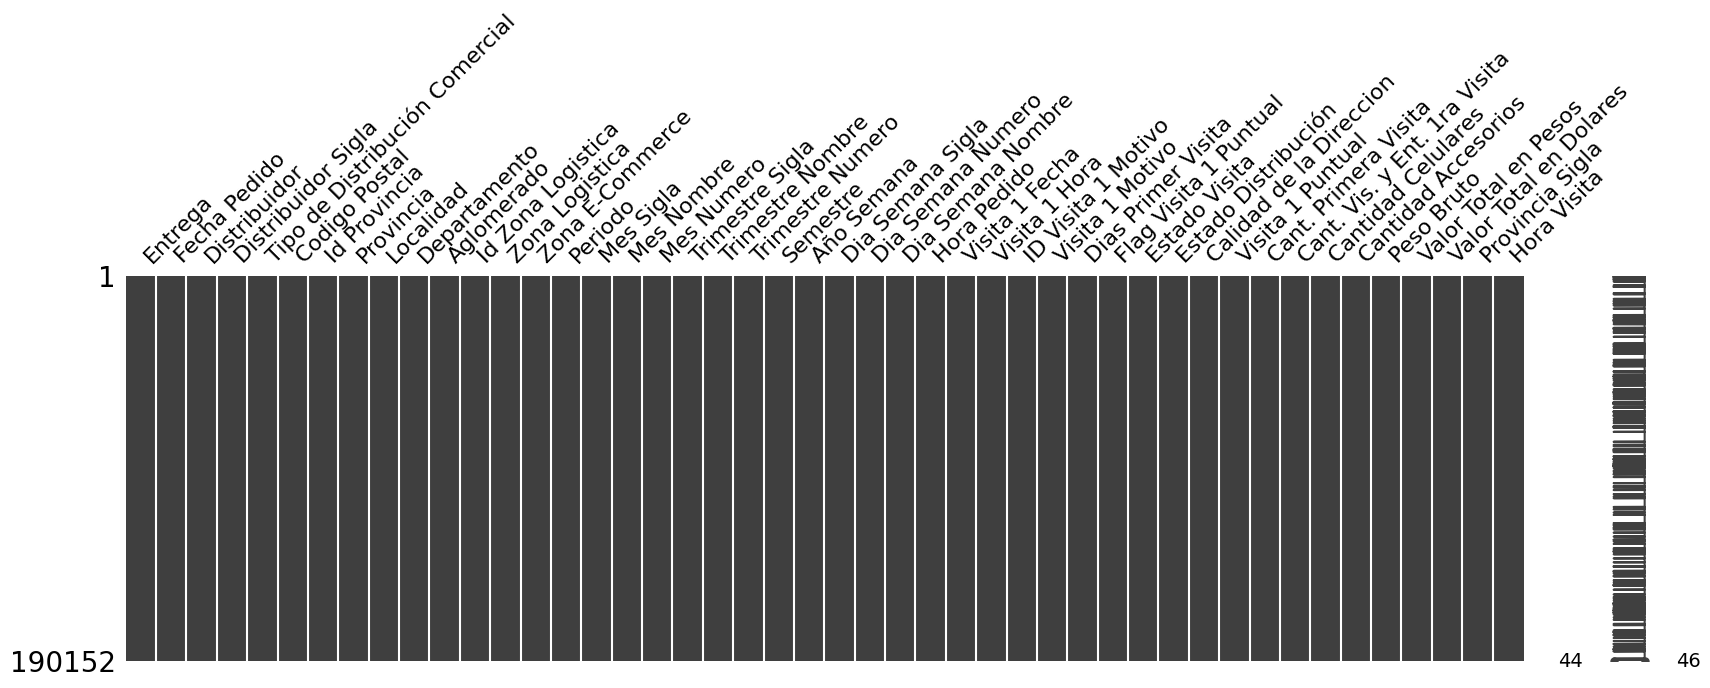

In [46]:
#Graficamos los nulos por columna
msno.matrix(df, figsize = (20,5))

## **Análisis con gráficas**

In [77]:
#Barras de Cantidad de Pedidos por Zona E-Commerce
df_zona_agrup = df.groupby('Zona E-Commerce', as_index=False)['Entrega'].count()

fig = px.bar(
    df_zona_agrup,
    x='Zona E-Commerce',
    y='Entrega',
    title='Cantidad de Pedidos x Zona',
    labels={'Zona E-Commerce': 'Zona', 'Cantidad de Pedidos': 'Cantidad de Pedidos'},
    color='Zona E-Commerce',  # Colorear las barras en función del salario
    width = 800,
    height = 400,
    color_discrete_map = {
        'AMBA': '#7FD4C1',
        'BALA': '#30BFDD',
        'CUYO': '#8690FF',
        'GBA': '#ACD0F4',
        'LINO': '#F7C0BB',
        'LISU': '#F8D0BB',
        'MEDI': '#F9A0BB',
        'NOA': '#D750BA',
        'PATAGONIA': '#A2C0BB'

        }
)


fig.update_traces(
    textposition='inside',  # Posición de los valores (texto) en las barras
    marker_line_color= None,  # Color del borde de las barras
    marker_line_width=1.5       # Grosor del borde de las barras
)

fig.update_layout(
    #xaxis_title='Categorías',
    #yaxis_title='Ventas Totales',
    #template='presentation',  # Tema del gráfico
    bargap=0.0,  # Espacio entre las barras (0 a 1)
    bargroupgap=0.1,  # Espacio entre grupos de barras
    xaxis_title="Zonas",
    yaxis_title="Cantidad"
)

fig.show()

In [72]:
#Porcentaje de Pedidos por Proveedor Logístico
df_proveedor_agrup = df.groupby('Distribuidor Sigla', as_index=False)['Entrega'].count()

fig = px.pie(
    df,
    names ='Distribuidor Sigla',
    values ='Entrega',
    title='Cantidad de Pedidos x Proveedor',
    labels={'Distribuidor Sigla': 'Dist', 'Cantidad de Pedidos': 'Cant'},
    color='Distribuidor Sigla',  # Colorear las barras en función del salario
    #text='Entrega',
    width = 600,
    height = 400,
    color_discrete_map = {
        'AND': '#7FD4C1',
        'COA': '#30BFDD',
        #'C': '#8690FF',
        #'D': '#ACD0F4',
        #'E': '#F7C0BB'
        }
)


fig.update_traces(
    textposition='inside',  # Posición de los valores (texto) en las barras
    marker_line_color= None,  # Color del borde de las barras
    marker_line_width=1.5       # Grosor del borde de las barras
)

fig.update_layout(
    #xaxis_title='Categorías',
    #yaxis_title='Ventas Totales',
    #template='presentation',  # Tema del gráfico
    bargap=0.0,  # Espacio entre las barras (0 a 1)
    bargroupgap=0.1  # Espacio entre grupos de barras
)

fig.show()

In [121]:
#Efectividad de la Primer Visita por Proveedor y Periodo
df_efect_prov_periodo_agrup = df.groupby(['Distribuidor Sigla','Periodo']).agg(
    Cantidad_Pedidos = ('Entrega', 'count'),
    Cantidad_Pedidos_Efectivos = ('Cant. Vis. y Ent. 1ra Visita', "sum")
).reset_index()

df_efect_prov_periodo_agrup['Efectividad'] = df_efect_prov_periodo_agrup['Cantidad_Pedidos_Efectivos']/df_efect_prov_periodo_agrup['Cantidad_Pedidos']

fig = px.line(
    df_efect_prov_periodo_agrup,
    x = "Periodo",
    y = "Efectividad",
    width = 800,
    height = 400,
    text = df_efect_prov_periodo_agrup["Efectividad"].apply(lambda x: f"{x:.1%}"),
    color='Distribuidor Sigla',
    labels={'Efectividad': "% Efectividad", "Periodo": "Mes"}
    )

fig.update_traces(
    mode="lines+markers+text",
    textposition="top center"
    )

fig.show()

#Efectividad de la Primer Visita por Proveedor y Zona
df_efect_prov_zona_agrup = df.groupby(['Distribuidor Sigla','Zona E-Commerce']).agg(
    Cantidad_Pedidos_2 = ('Entrega', 'count'),
    Cantidad_Pedidos_Efectivos_2 = ('Cant. Vis. y Ent. 1ra Visita', "sum")
).reset_index()

df_efect_prov_zona_agrup['Efectividad'] = df_efect_prov_zona_agrup['Cantidad_Pedidos_Efectivos_2']/df_efect_prov_zona_agrup['Cantidad_Pedidos_2']

fig2 = px.line(
    df_efect_prov_zona_agrup,
    x = "Zona E-Commerce",
    y = "Efectividad",
    width = 800,
    height = 400,
    text = df_efect_prov_zona_agrup["Efectividad"].apply(lambda x: f"{x:.1%}"),
    color='Distribuidor Sigla',
    labels={'Efectividad': "% Efectividad", "Periodo": "Mes"}
    )

fig2.update_traces(
    mode="lines+markers+text",
    textposition="top center"
    )

fig2.show()

## **Conclusiones EDA**
Se comprueban ambas hipótesis planteadas al principio:
* *Hipótesis 1:* La Zona Geográfica afecta a los indicadores de la Primer Visita. Por ejemplo:
  * Se puede observar claramente la baja performance en AMBA de ambos proveedores
  * También se observa como los dos proveedores mejoran sus números distribuyendo en la zona BALA (Buenos Aires - La Pampa)
  * Llama también la atención que el proveedor de peor desempeño, tiene el mejor indicador de todos en la Zona GBA (Gran Buenos Aires)

* *Hipótesis 2:* Los proveedores claramente tienen un desempeño distinto según las zonas
  * Andreani tiene un comportamiento más estable/predecible a nivel nacional, incluso con el atenuante de tener un mayor volumen para distribuir
  * Correo Argentino tiene números muchos más bajos, pero a favor de ellos se observa un crecimiento bastante sostenido a lo largo del año

# Análisis Estadístico de datos

<Axes: xlabel='Fecha Pedido'>

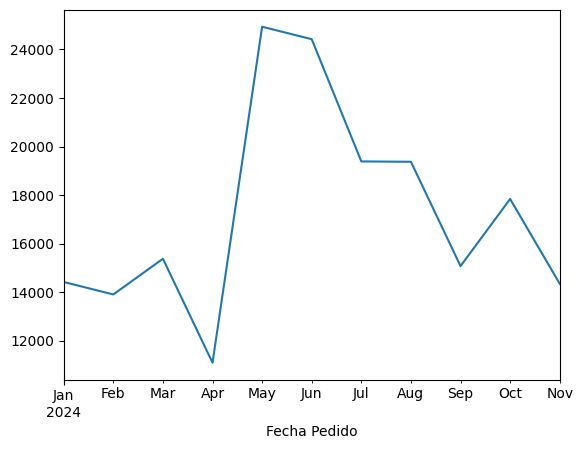

In [122]:
pedidos_mensuales =df.groupby(df['Fecha Pedido'].dt.to_period('M')).size()
pedidos_mensuales.plot.line()

In [124]:
#Describe
scipy.stats.describe(pedidos_mensuales)

DescribeResult(nobs=11, minmax=(11090, 24936), mean=17286.545454545456, variance=19376173.87272728, skewness=0.5971480494189711, kurtosis=-0.7033379112586147)

In [126]:
#Media Geometrica
scipy.stats.gmean(pedidos_mensuales)

16802.551267746076

In [127]:
# Media Armonica
scipy.stats.hmean(pedidos_mensuales)

16347.505276951184

In [128]:
#Media recortada (Proporcion removida en cada cola 10%)
scipy.stats.trim_mean(pedidos_mensuales,0.1)

17125.11111111111

In [130]:
#Moda
scipy.stats.mode(pedidos_mensuales)

ModeResult(mode=11090, count=1)

In [132]:
#Coeficiente de variacion
scipy.stats.variation(pedidos_mensuales)

0.242789251616361

In [133]:
#IQR
scipy.stats.iqr(pedidos_mensuales)

4997.0

In [137]:
# Calculo del Error estandar
scipy.stats.sem(pedidos_mensuales)

1327.2039602359976

In [134]:
#Calcular el CA
scipy.stats.skew(pedidos_mensuales)

0.5971480494189711

In [135]:
# Calcular el CA_p
scipy.stats.kurtosis(pedidos_mensuales)

-0.7033379112586147

## Análsis Univariado

In [ ]:
variables = [
    'Fecha Pedido', 'Hora Pedido','Distribuidor', 'Tipo de Distribución Comercial',
    'Codigo Postal', 'Provincia', 'Localidad', 'Departamento',
    'Aglomerado', 'Id Zona Logistica', 'Zona Logistica', 'Zona E-Commerce',
    'Periodo', 'Mes Sigla', 'Trimestre Numero', 'Semestre',
    'Año Semana', 'Dia Semana Sigla', 'Visita 1 Fecha', 'Hora Visita',
    'Visita 1 Motivo', 'Dias Primer Visita', 'Flag Visita 1 Puntual', 'Estado Visita',
    'Estado Distribución', 'Calidad de la Direccion', 'Cantidad de Pedidos', 'Visita 1 Puntual',
    'Cant. Primera Visita', 'Cant. Vis. y Ent. 1ra Visita', 'Cantidad Celulares', 'Cantidad Accesorios',
    'Peso Bruto', 'Valor Total en Pesos', 'Valor Total en Dolares', 'Provincia Sigla'
    ]
columns = 3

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(30,30))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(df[variable], ax=axes[i][j], kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()

## Análsis Bivariado

## Análisis Multivariado

# Ingeniería de atributos

# Entrenamiento y Testeo

# Validación del Modelo

# Optimización del Modelo

# Ensamble